In [30]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

A,B,C,D = 1,1,0,0

Dataset = [[0,-10],[5,10],[10,-10]] # [x,Y]

In [31]:
def f(x):
    global A,B,C,D
    return A * np.sin(B * (x + C)) + D

In [32]:
def calcSSE():
    sse = 0
    for x,y in Dataset:
        sse += y - f(x)
    return sse

In [33]:
def J():
    return 1/2 * calcSSE() ** 2

In [34]:
# implementation of the stochastic gradient descent algorithm
# this function performs one gradient step and optimizes J()

def SGDstep(lr=0.005):
    global A,B,C,D
    
    for x,y in Dataset:
        
        Y = f(x)
        
        dJdY = (Y-y)
        
        dYdA = np.sin(B + (x + C))
        dJdA = dJdY * dYdA
        
        dYdB = A * (x + C) * np.cos((x + C) * B)
        dJdB = dJdY * dYdB
        
        dYdC = A * B * np.cos(B * (x + C))
        dJdC = dJdY * dYdC
        
        dYdD = 1
        dJdD = dJdY * dYdD
        
        A = A - lr * dJdA
        B = B - lr * dJdB
        C = C - lr * dJdC
        D = D - lr * dJdD

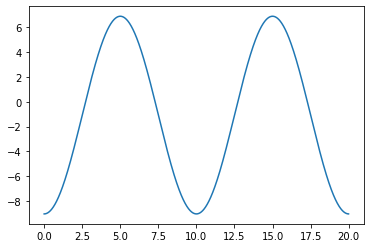

A= -7.960653750903361; B = 0.6283185307333243; C = -7.499999999847877; D = -1.0755910996348306


In [35]:
# this is the main loop
annealing = True # enabeling simulated annealing, to jump out of local minimas
for i in range(1000, 1, -1):
    if annealing:
        SGDstep(i/100000)
    else:
        SGDstep()
    
    clear_output(wait=True)
    x = np.arange(0,20,0.01)   # start,stop,step
    y = f(x)
    plt.plot(x,y)
    plt.show()
    print("A= " + str(A) + "; B = " + str(B) + "; C = " + str(C) + "; D = " + str(D))